In [2]:
%matplotlib inline

## Setup GPU Device

In [3]:
import random

In [4]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [1]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

Using backend: pytorch


### Choose Number of Training Samples

### Train Test Split

In [2]:
import random
random.seed(0)
training_size = 30
training_idx = random.sample(list(range(5,65)), training_size) #exclude 4-bit adders
test_idx = [item for item in list(range(5,65)) if item not in training_idx]

## Pick Training Data

In [3]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/preprocessing/processed_training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(1)
sample_size = 10
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_2 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_3 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_4 = np.random.choice(training_idx, size=sample_size, replace=False)

training_idx_2 = training_idx_1
training_idx_3 = training_idx_1
training_idx_4 = training_idx_1
# training_idx_1 = [6]
# training_idx_2 = [6]
# training_idx_3 = [6]
# training_idx_4 = [6]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39]


### Prepare Training and Test Data

In [4]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


### Visualize Training Data

In [5]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

### Apply random shuffle to training set

In [6]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [7]:
len(trainset_shuffled)

40

In [8]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [9]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

### Readout and classification

In [10]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

### Setup and training

In [11]:
import torch.optim as optim
from torch.utils.data import DataLoader

### Make Training Results Deterministic

In [12]:
# import torch
# torch.manual_seed(0)
# #CuDNN:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

## Set Training Epoch

In [13]:
training_epoch = 500 #original = 1500 for 1 training sample 500 for 20 samples
initial_lr = 0.001

In [14]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
import time

model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr = initial_lr)
# optimizer = optim.SGD(model.parameters(), lr = initial_lr, momentum=0.9, weight_decay=5e-4)

model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []

#start timer:
t0 = time.time()

for epoch in range(training_epoch):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

training_time = time.time() - t0

print('Finished training. Training time = {:.4f} Seconds'.format(training_time))

Epoch 0, loss 1.6817
Epoch 1, loss 1.4819
Epoch 2, loss 1.4503
Epoch 3, loss 1.4274
Epoch 4, loss 1.4035
Epoch 5, loss 1.3828
Epoch 6, loss 1.3597
Epoch 7, loss 1.3429
Epoch 8, loss 1.3439
Epoch 9, loss 1.2839
Epoch 10, loss 1.2381
Epoch 11, loss 1.2781
Epoch 12, loss 1.2150
Epoch 13, loss 1.1266
Epoch 14, loss 1.1254
Epoch 15, loss 1.1212
Epoch 16, loss 1.0508
Epoch 17, loss 1.0519
Epoch 18, loss 0.9790
Epoch 19, loss 1.0507
Epoch 20, loss 0.9729
Epoch 21, loss 0.9547
Epoch 22, loss 0.9377
Epoch 23, loss 1.0128
Epoch 24, loss 0.9190
Epoch 25, loss 0.9044
Epoch 26, loss 0.8949
Epoch 27, loss 0.8873
Epoch 28, loss 0.9783
Epoch 29, loss 0.8791
Epoch 30, loss 0.8652
Epoch 31, loss 0.8510
Epoch 32, loss 0.8454
Epoch 33, loss 0.8382
Epoch 34, loss 0.8356
Epoch 35, loss 0.8309
Epoch 36, loss 0.8256
Epoch 37, loss 0.8189
Epoch 38, loss 0.8112
Epoch 39, loss 0.8037
Epoch 40, loss 0.7951
Epoch 41, loss 0.7866
Epoch 42, loss 0.7785
Epoch 43, loss 0.7686
Epoch 44, loss 0.7590
Epoch 45, loss 0.750

### Finish Training

### Plot Loss

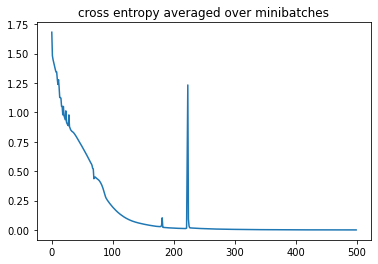

In [15]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [16]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

### Get Testset data

In [17]:
testset = []
test_labels = []
test_dir = dir

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in test_idx:
    testing_idx_1.append(i)
    testing_idx_2.append(i)
    testing_idx_3.append(i)
    testing_idx_4.append(i)
      
# print(testing_idx_1)
# print(training_idx_1)
# print(testing_idx_2)
# print(training_idx_2)
# print(testing_idx_3)
# print(training_idx_3)
# print(testing_idx_4)
# print(training_idx_4)

### Random Sample Nodes and Edges for Testing

## Set Percentage Keep

In [18]:
pct_keep = 0.95

In [19]:
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    
    #randomly sample edges but keep all nodes
    
#     node_list_keep = random.sample(node_list,int(len(node_list)*pct_keep))
    node_list_keep = node_list
    edge_list_keep = random.sample(edge_list,int(len(edge_list)*pct_keep))
#     node_list2_keep = random.sample(node_list2,int(len(node_list2)*pct_keep))
    node_list2_keep = node_list2
    edge_list2_keep = random.sample(edge_list2,int(len(edge_list2)*pct_keep))
#     node_list3_keep = random.sample(node_list3,int(len(node_list3)*pct_keep))
    node_list3_keep = node_list3
    edge_list3_keep = random.sample(edge_list3,int(len(edge_list3)*pct_keep))
#     node_list4_keep = random.sample(node_list4,int(len(node_list4)*pct_keep))
    node_list4_keep = node_list4
    edge_list4_keep = random.sample(edge_list4,int(len(edge_list4)*pct_keep))
    
    #create dgl graph
    g=build_circuit_graph_undirected(node_list_keep,edge_list_keep)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2_keep,edge_list2_keep)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3_keep,edge_list3_keep)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4_keep,edge_list4_keep)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

# print(test_labels)

In [20]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

### Test on Testset

In [22]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels_shuffled = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)

sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100))

# zip(model(test_bg),(test_labels))
# for i1,i2 in zip(probs_Y,(test_labels)):
#     print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 73.3333%
Accuracy of argmax predictions on the test set: 72.5000%


<ipython-input-22-02714feea485>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_shuffled = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()


## Finish Testing

## Get Error Items

In [25]:
error = (test_labels_shuffled != argmax_Y.float()).nonzero()
print('Total', len(error),'errors out of',len(test_idx)*4,'test data')
for i in error.cpu().numpy():
    error_idx= i[0]
    print(probs_Y[error_idx],test_labels_shuffled[error_idx])
#     print(i[0])

Total 33 errors out of 120 test data
tensor([9.0654e-02, 6.9918e-01, 2.1306e-08, 2.1016e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([7.3991e-03, 9.9060e-01, 4.4414e-12, 2.0005e-03], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([2.0851e-03, 2.9746e-06, 7.4569e-03, 9.9045e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([5.0032e-03, 9.9486e-01, 2.1922e-13, 1.3506e-04], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([3.3019e-01, 4.9197e-01, 4.1412e-08, 1.7784e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([3.7220e-01, 5.4988e-01, 8.1235e-09, 7.7920e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([2.5922e-01, 5.9745e-01, 2.0642e-08, 1.4333e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tens

In [26]:
test_accuracy = '{:4f}'.format((test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100)

In [ ]:
EPS = 1e-15
edge_size = 0.5

def __graph_loss__(log_logits, pred_label,edge_mask):
        loss = -torch.log(log_logits[0,pred_label])
#         print(loss)
        edge_mask = torch.Tensor(edge_mask)
        m = edge_mask.sigmoid()
        loss = loss + edge_size * m.sum()

        ent = -m * torch.log(m + EPS) - (1 - m) * torch.log(1 - m+ EPS)
        loss = loss + 1 * ent.mean()

        return loss

In [ ]:
import numpy as np
from bga import BGA

test_graph,test_label = testset_new[8]
x = test_graph.in_degrees().view(-1, 1).float().cuda()
a = test_graph.edges()[0].tolist()
b = test_graph.edges()[1].tolist()
edges = list(zip(a,b))
edges = np.array(edges)
edges = torch.LongTensor(edges.transpose()).cuda()
probs_Y,_,_,_=model(x,edges)
probs_Y = torch.softmax(probs_Y, 1)
pred_label = probs_Y.argmax(dim=-1)
print("predicted label:",pred_label.item())
num_edges = len(test_graph.edges()[0])
print("num_edges:",num_edges)

def fitness_func(edge_mask):
    a = test_graph.edges()[0].tolist()
    b = test_graph.edges()[1].tolist()
    if(edge_mask.sum()==0):
        #eliminate trivial solution
        return 9999
    edge_list=[]
    for index, edge in enumerate(edge_mask):
        if edge:
            edge_list.append((a[index],b[index]))
    edges = np.array(edge_list)
    
    edges = torch.LongTensor(edges.transpose()).cuda()
    
    log_logits,_,_,_=model(x,edges)
    pred = torch.softmax(log_logits, 1)
    
    loss = __graph_loss__(pred, pred_label,edge_mask)
    return loss.cpu().detach().numpy()[0]
    
num_pop = 100
problem_dimentions = num_edges

test = BGA(pop_shape=(num_pop, problem_dimentions), method=fitness_func, p_c=0.8, p_m=0.2, max_round = 1000, early_stop_rounds=None, verbose = None, maximum=False)

In [ ]:
best_solution, best_fitness,fitness_record = test.run()

In [ ]:
print(best_solution)
edge_mask = torch.LongTensor(best_solution)
plt = visualize(edge_index=edges, edge_mask=edge_mask,threshold=0.1)
plt.show()

